# Loan Predication

## About Dataset 

Among all industries, insurance domain has the largest use of analytics & data science methods. This data set would provide you enough taste of working on data sets from insurance companies, what challenges are faced, what strategies are used, which variables influence the outcome etc. This is a classification problem. The data has 615 rows and 13 columns.

## Problem statement

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

In [1]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [2]:
loan = pd.read_csv("train.csv")
loan.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
loan.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [4]:
# number of colunms and rows
loan.shape

(614, 13)

In [5]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
# statistical measures
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
# number of missing values in each column
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
# dropping the missing values
loan = loan.dropna()

In [10]:
# number of missing values in each column
loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
# label encoding
loan.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [12]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [13]:
# Dependent column values
loan['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [14]:
# replacing the value of 3+ to 4
loan = loan.replace(to_replace='3+', value=4)

In [15]:
# dependent values
loan['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

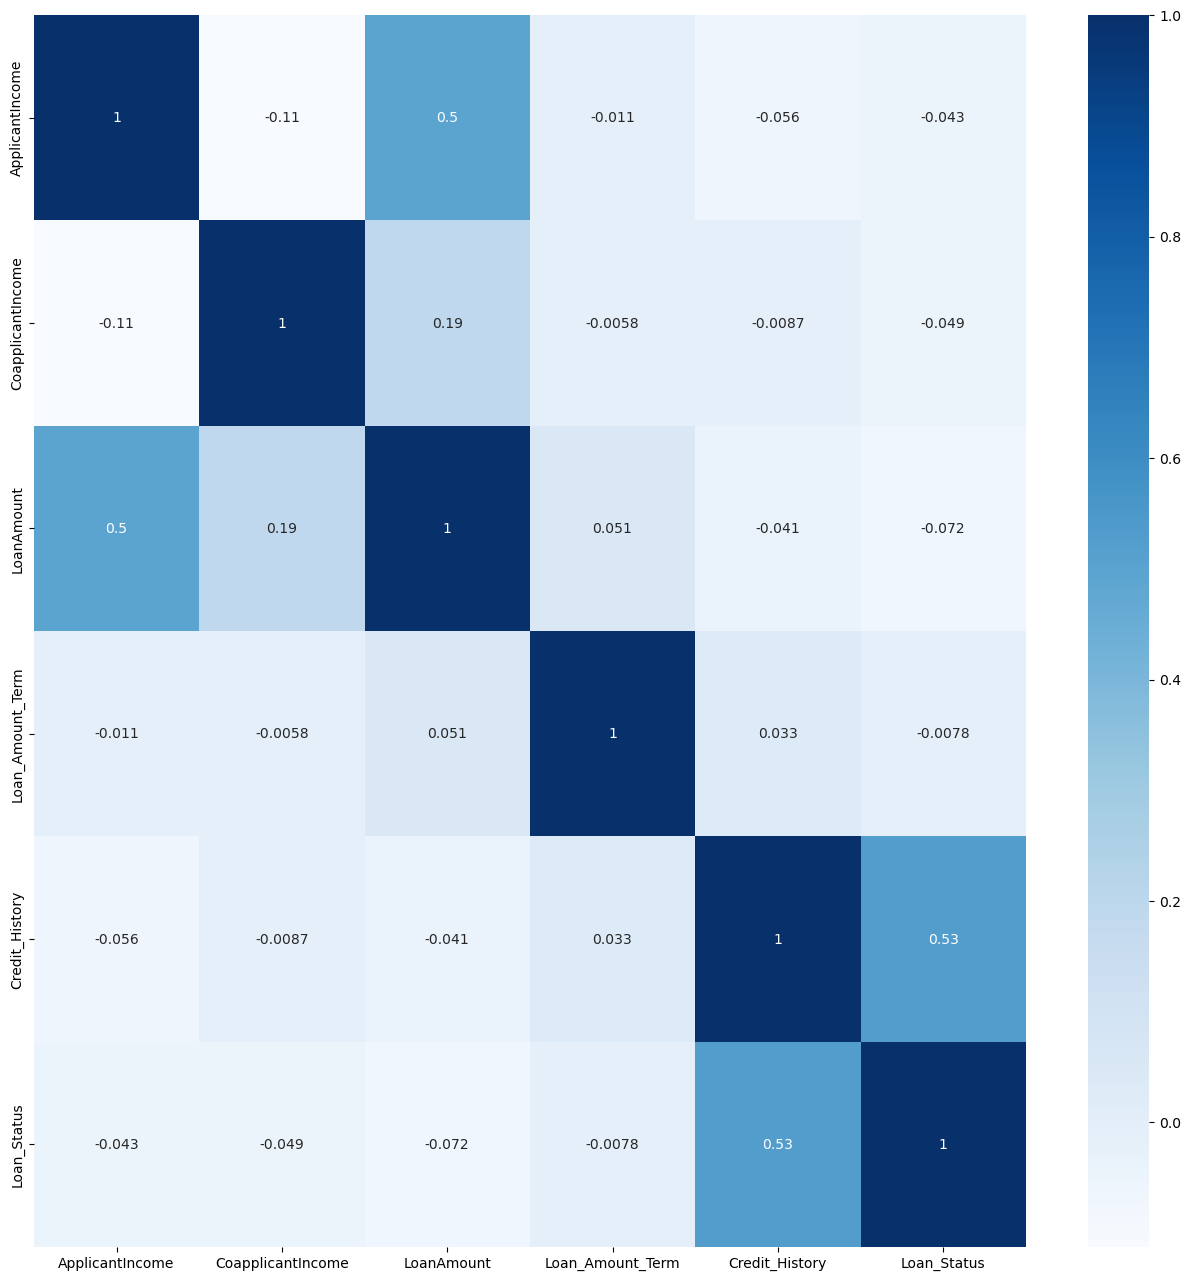

In [17]:

# constructing a heatmap to understand the correlatiom
correlation = loan.corr()
plt.figure(figsize = (16,16))
sns.heatmap(loan.corr(), annot = True, cmap = "Blues")

plt.show()

### Data Visualization

<AxesSubplot:xlabel='Education', ylabel='count'>

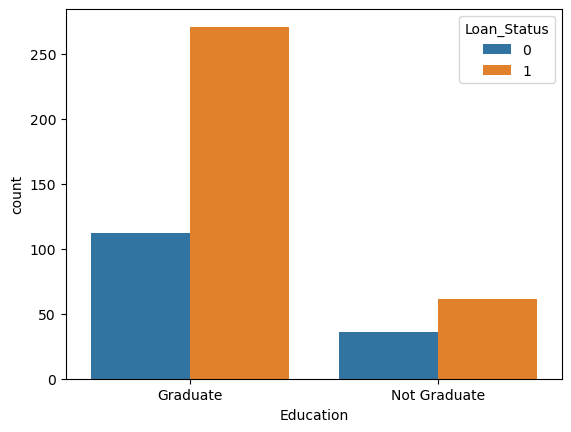

In [18]:
# education & Loan Status
sns.countplot(x='Education',hue='Loan_Status',data=loan)

<AxesSubplot:xlabel='Married', ylabel='count'>

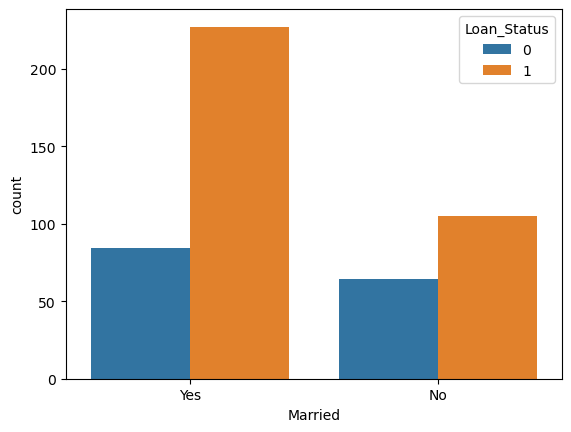

In [19]:
# marital status & Loan Status
sns.countplot(x='Married',hue='Loan_Status',data=loan)

In [20]:
# convert categorical columns to numerical values
loan.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [21]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [25]:
# separating the data and label
features = loan.drop(columns=['Loan_ID','Loan_Status'],axis=1)
target = loan['Loan_Status']

In [26]:
features.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2


In [27]:
target

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64

In [28]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []
     

In [29]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

### Support Vector Machine (SVM)

In [30]:
from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)
# transform testing dataabs
X_test_norm = norm.transform(Xtest)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,Ytrain)
predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.78125
              precision    recall  f1-score   support

           0       1.00      0.43      0.60        37
           1       0.74      1.00      0.85        59

    accuracy                           0.78        96
   macro avg       0.87      0.72      0.73        96
weighted avg       0.84      0.78      0.75        96



In [31]:
# Cross validation score (SVM)
from sklearn.model_selection import cross_val_score
score = cross_val_score(SVM,features,target,cv=5)
print(score)
print(np.mean(score))

[0.6875     0.67708333 0.6875     0.69791667 0.69791667]
0.6895833333333333


In [32]:
import pickle
# open a file, where you ant to store the data
file = open('crop_model.pkl', 'wb')
# dump information to that file
pickle.dump(SVM, file)

### Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  76.04166666666666
              precision    recall  f1-score   support

           0       0.89      0.43      0.58        37
           1       0.73      0.97      0.83        59

    accuracy                           0.76        96
   macro avg       0.81      0.70      0.71        96
weighted avg       0.79      0.76      0.74        96



In [34]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)
print(score)
print(np.mean(score))

[0.78125    0.75       0.77083333 0.73958333 0.78125   ]
0.7645833333333334


### Saving trained Decision Tree model

In [35]:
import pickle
# open a file, where you ant to store the data
file = open('DecisionTree_model.pkl', 'wb')
# dump information to that file
pickle.dump(DecisionTree, file)

### Guassian Naive Bayes

In [36]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.7708333333333334
              precision    recall  f1-score   support

           0       0.89      0.46      0.61        37
           1       0.74      0.97      0.84        59

    accuracy                           0.77        96
   macro avg       0.82      0.71      0.72        96
weighted avg       0.80      0.77      0.75        96



In [37]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
print(score)
print(np.mean(score))

[0.78125    0.77083333 0.77083333 0.86458333 0.77083333]
0.7916666666666667


### Saving trained Guassian Naive Bayes model

In [38]:
import pickle
# open a file, where you ant to store the data
file = open('NBClassifier.pkl', 'wb')
# dump information to that file
pickle.dump(NaiveBayes, file)

### Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.75
              precision    recall  f1-score   support

           0       0.93      0.38      0.54        37
           1       0.72      0.98      0.83        59

    accuracy                           0.75        96
   macro avg       0.82      0.68      0.68        96
weighted avg       0.80      0.75      0.72        96



In [40]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
print(score)
print(np.mean(score))

[0.80208333 0.78125    0.78125    0.84375    0.77083333]
0.7958333333333334


### Saving trained Logistic Regression model

In [41]:
import pickle
# open a file, where you ant to store the data
file = open('LogisticRegression.pkl', 'wb')
# dump information to that file
pickle.dump(LogReg, file)

### Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.7604166666666666
              precision    recall  f1-score   support

           0       0.82      0.49      0.61        37
           1       0.74      0.93      0.83        59

    accuracy                           0.76        96
   macro avg       0.78      0.71      0.72        96
weighted avg       0.77      0.76      0.74        96



In [43]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
print(score)
print(np.mean(score))

[0.78125    0.73958333 0.80208333 0.83333333 0.78125   ]
0.7875000000000001


### Saving trained Random Forest model

In [44]:
import pickle
# open a file, where you ant to store the data
file = open('RandomForest.pkl', 'wb')
# dump information to that file
pickle.dump(RF, file)

### Accuracy Comparison

<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

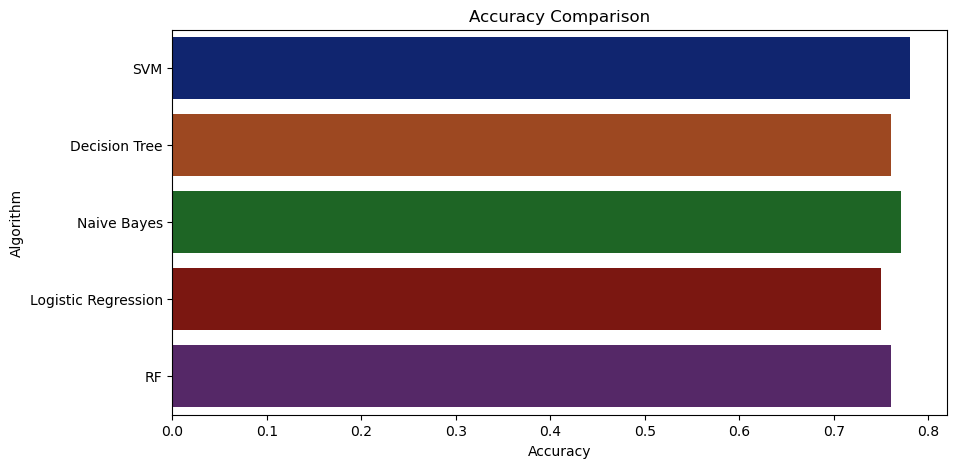

In [51]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

### Making a Predictive System

In [56]:
input_data = (1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2)
# changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the np array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = RF.predict(input_data_reshaped)
print(prediction)

if (prediction[0]=='NO'):
  print('Not eligible loan')
else:
  print('Yes eligible loan')

[1]
Yes eligible loan
